# Supervised Machine Learning with Python II


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

# Objectives

* Learn the basic principles behind classification

* Get to know some of the most commonly used algorithms for classification.


* Learn the importance of metrics in classification, especially with unbalanced classes 

* Combine several weak learners to create a single strong one.


# Introduction to Classification 



In the simplest case we want to predict pertenence to a class given some input variables. 

We can codify pertenence as 1, non-pertenence as 0.

<img src="http://openclassroom.stanford.edu/MainFolder/courses/MachineLearning/exercises/ex8materials/ex8b_10.png" alt="Classification" style="width: 600px; float: left;"/>

That means that we want to fit a function $p$ that, for a given value of X, produces a _probability_ of belonging to the class.

$$p(X) = P(Y = 1 \mid X)$$

What about linear regression?

### Logistic Regression

$$p(X) = \frac{e^{\beta_0 + \beta_1 \cdot X}}{1 + e^{\beta_0 + \beta_1 \cdot X}}$$


![Logistic Function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

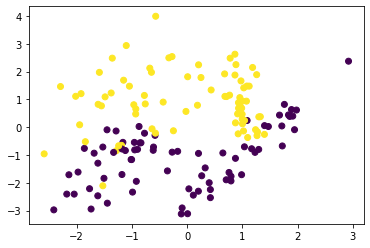

In [2]:
X, y = datasets.make_classification(n_samples=150,
                                    n_features=2,
                                    n_redundant=0)

plt.scatter(X[:,0], X[:,1], c=y)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

In [6]:
lr.predict_proba(X_test)

array([[0.01407321, 0.98592679],
       [0.98839412, 0.01160588],
       [0.37467331, 0.62532669],
       [0.04927309, 0.95072691],
       [0.11197157, 0.88802843],
       [0.38416753, 0.61583247],
       [0.95317114, 0.04682886],
       [0.98447583, 0.01552417],
       [0.01870791, 0.98129209],
       [0.76140814, 0.23859186],
       [0.87072941, 0.12927059],
       [0.41040245, 0.58959755],
       [0.68394486, 0.31605514],
       [0.99096239, 0.00903761],
       [0.44153202, 0.55846798],
       [0.04110238, 0.95889762],
       [0.68697229, 0.31302771],
       [0.99748895, 0.00251105],
       [0.37663807, 0.62336193],
       [0.64700938, 0.35299062],
       [0.9807427 , 0.0192573 ],
       [0.00620095, 0.99379905],
       [0.82441523, 0.17558477],
       [0.22947714, 0.77052286],
       [0.00186358, 0.99813642],
       [0.10738266, 0.89261734],
       [0.94496943, 0.05503057],
       [0.30413298, 0.69586702],
       [0.60318791, 0.39681209],
       [0.00799038, 0.99200962],
       [0.

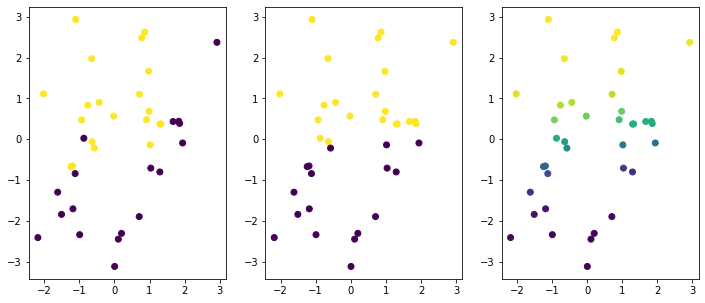

In [5]:
f, ax = plt.subplots(1, 3)
f.set_size_inches(12,5)
ax[0].scatter(X_test[:, 0], X_test[:,1], c=y_test)
ax[1].scatter(X_test[:, 0], X_test[:,1], c=y_hat)
ax[2].scatter(X_test[:, 0], X_test[:,1], c=lr.predict_proba(X_test)[:, 1])

# Metrics in classification

A first approximation could be the % of examples that we got right. This is called _accuracy_.

#### Exercise

Calculate the ratio of correct guesses.

In [8]:
np.mean(y_hat == y_test)

0.7631578947368421

What if we had very few positive examples?

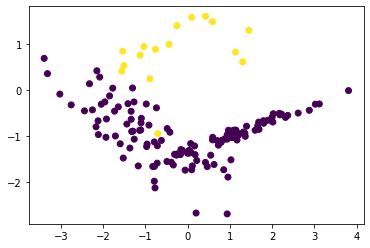

In [9]:
X, y = datasets.make_classification(n_samples=150,
                                    n_features=2,
                                    n_redundant=0,
                                    weights=[.9, .1])

plt.scatter(X[:, 0], X[:, 1], c=y)

In [10]:
guesses = np.zeros_like(y)

In [11]:
np.mean(guesses == y)

0.8933333333333333

## The Confusion Matrix

![A confusion matrix](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

from https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781838555078/6/ch06lvl1sec34/confusion-matrix

In [12]:
from sklearn.metrics import accuracy_score, mean_absolute_error, \
                            mean_squared_error, confusion_matrix

confusion_matrix(y_test, y_hat)


array([[13,  5],
       [ 4, 16]])

## Precision and recall

![Precision and recall](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

Probably best to understand them as conditional probabilities:

Precision: What is the probability that an example is actually positive, given I've predicted it to be positive?

Recall: What is the probability of me calling an example positive, given it is actually positive?

from https://en.wikipedia.org/wiki/Precision_and_recall

In [14]:
from sklearn.metrics import precision_score, recall_score

precision_score(y, guesses), recall_score(y, guesses)

/Users/dani/opt/anaconda3/envs/master2022/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [15]:
precision_score(y, np.ones_like(y)), recall_score(y, np.ones_like(y))

(0.10666666666666667, 1.0)

In [16]:
probs = lr.predict_proba(X_test)[:, 1]

probs

array([0.98592679, 0.01160588, 0.62532669, 0.95072691, 0.88802843,
       0.61583247, 0.04682886, 0.01552417, 0.98129209, 0.23859186,
       0.12927059, 0.58959755, 0.31605514, 0.00903761, 0.55846798,
       0.95889762, 0.31302771, 0.00251105, 0.62336193, 0.35299062,
       0.0192573 , 0.99379905, 0.17558477, 0.77052286, 0.99813642,
       0.89261734, 0.05503057, 0.69586702, 0.39681209, 0.99200962,
       0.62259144, 0.47689532, 0.88473332, 0.79848615, 0.78311034,
       0.6164936 , 0.02214252, 0.14062727])

In [17]:
y_hat

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [21]:
precision_score(y_test, y_hat), recall_score(y_test, y_hat)

(0.7619047619047619, 0.8)

In [22]:
bolder_predictions = probs > .4

precision_score(y_test, bolder_predictions), recall_score(y_test, bolder_predictions)

(0.7727272727272727, 0.85)

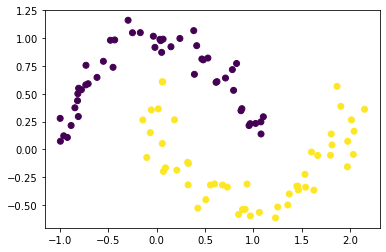

In [23]:
moons_X, moons_y = datasets.make_moons(noise=.1)

plt.scatter(moons_X[:,0], moons_X[:,1], c=moons_y)

## F1 measure

A good default choice because it combines both precision and recall:

$$ F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$


### $F_\beta$

F beta is a generalization of F1 that uses a (positive) weighting $\beta$ so that recall is considered $\beta$ times more important than precision.

In [24]:
from sklearn.metrics import f1_score, fbeta_score

f1_score(y_test, y_hat)

0.7804878048780488

In [25]:
f1_score(y, guesses)

0.0

In [26]:
f1_score(y, np.ones_like(y))

0.1927710843373494

In [27]:
fbeta_score(y_test, y_hat, beta=.2)

0.763302752293578

## Other metrics

https://en.wikipedia.org/wiki/Precision_and_recall

# Decision boundaries


```python
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import ListedColormap


x_min, x_max = df_pd['x'].min()-0.1, df_pd['x'].max()+0.1
y_min, y_max = df_pd['y'].min()-0.1, df_pd['y'].max()+0.1  

def plot_decision_boundaries(x, y, labels, model, 
                             x_min=x_min, 
                             x_max=x_max, 
                             y_min=y_min, 
                             y_max=y_max, 
                             grid_step=0.02):
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))
    
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]

    Z = Z.reshape(xx.shape)

    arr = plt.cm.coolwarm(np.arange(plt.cm.coolwarm.N))
    arr_hsv = mpl.colors.rgb_to_hsv(arr[:,0:3])
    arr_hsv[:,2] = arr_hsv[:,2] * 1.5
    arr_hsv[:,1] = arr_hsv[:,1] * .5
    arr_hsv = np.clip(arr_hsv, 0, 1)
    arr[:,0:3] = mpl.colors.hsv_to_rgb(arr_hsv) 
    my_cmap = ListedColormap(arr)
    
    fig, ax = plt.subplots(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=my_cmap)

    ax.scatter(x, y, c=labels, cmap='coolwarm')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.grid(False)
    return ax
```


<AxesSubplot:>

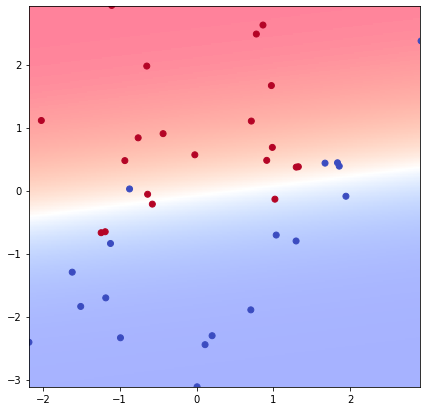

In [28]:
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import ListedColormap


def plot_decision_boundaries(x, y, labels, model,  
                             grid_step=0.02):

    x_min = min(x)
    x_max = max(x)
    y_min = min(y)
    y_max = max(y)
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))

    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]

    Z = Z.reshape(xx.shape)

    arr = plt.cm.coolwarm(np.arange(plt.cm.coolwarm.N))
    arr_hsv = mpl.colors.rgb_to_hsv(arr[:,0:3])
    arr_hsv[:,2] = arr_hsv[:,2] * 1.5
    arr_hsv[:,1] = arr_hsv[:,1] * .5
    arr_hsv = np.clip(arr_hsv, 0, 1)
    arr[:,0:3] = mpl.colors.hsv_to_rgb(arr_hsv) 
    my_cmap = ListedColormap(arr)

    fig, ax = plt.subplots(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=my_cmap)

    ax.scatter(x, y, c=labels, cmap='coolwarm')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.grid(False)
    return ax

plot_decision_boundaries(X_test[:, 0], X_test[:, 1], y_test, lr)

# Decision Trees

[A visual explanation of Decision Trees](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)

## Decision Trees

Learn a series of if-else questions leading to a decision.

Can be used both for regression and classification.

In the classification setting, each node corresponds to a prediction with a certain confidence.

data to program versus program ![Titanic Decision Tree](https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)

## Building a decision tree

![Decision Tree](https://image.slidesharecdn.com/lecture02ml4ltmarinasantini2013-130827052029-phpapp02/95/lecture-02-machine-learning-for-language-technology-decision-trees-and-nearest-neighbors-10-638.jpg?cb=1378716784)

What is the meaning, then, of building the best tree we can?

### Measures of quality

For a decision tree that separates $K$ classes, we can measure its quality by:

The Gini index
$$G = \sum_{k=1}^K \hat{p}_{mk} (1 - \hat{p}_{mk})$$

Cross-entropy

$$D = - \sum_{k=1}^K \hat{p}_{mk} \log \hat{p}_{mk}$$



![Splitting the feature space with a tree](https://upload.wikimedia.org/wikipedia/commons/8/87/Recursive_Splitting.png)

<AxesSubplot:>

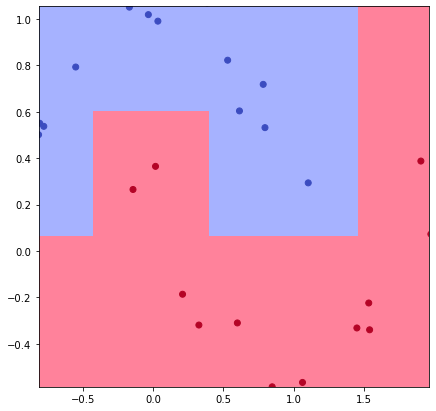

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(moons_X, moons_y)

dt.fit(moons_X, moons_y)

plot_decision_boundaries(X_test[:, 0], X_test[:, 1], y_test, dt)

### Advantages and disadvantages of trees

Pros:

- Easily interpretable

Cons:

- Not robust

## Practical: Decision Trees

### Reading the data in and preparing for training

https://www.kaggle.com/c/GiveMeSomeCredit


In [33]:
breast_cancer = datasets.load_breast_cancer(as_frame=True)

breast_X = breast_cancer['data']
breast_y = breast_cancer['target']

#### Exercise: 
What is the overall probability of cancer?

In [35]:
np.mean(breast_y)

0.6274165202108963

### Train

In [36]:
X_train, X_test, y_train, y_test = train_test_split(breast_X, breast_y)

In [37]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

(accuracy_score(y_test, y_hat), 
precision_score(y_test, y_hat), 
recall_score(y_test, y_hat))

/Users/dani/opt/anaconda3/envs/master2022/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.916083916083916, 0.9318181818181818, 0.9318181818181818)

In [38]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_hat = dt.predict(X_test)

(accuracy_score(y_test, y_hat), 
precision_score(y_test, y_hat), 
recall_score(y_test, y_hat))

(0.9230769230769231, 0.9529411764705882, 0.9204545454545454)

To visualize trees, we can use `graphviz`

```python
import graphviz 
dot_data = tree.export_graphviz(classifier_tree, out_file=None) 
graph = graphviz.Source(dot_data)
graph
```

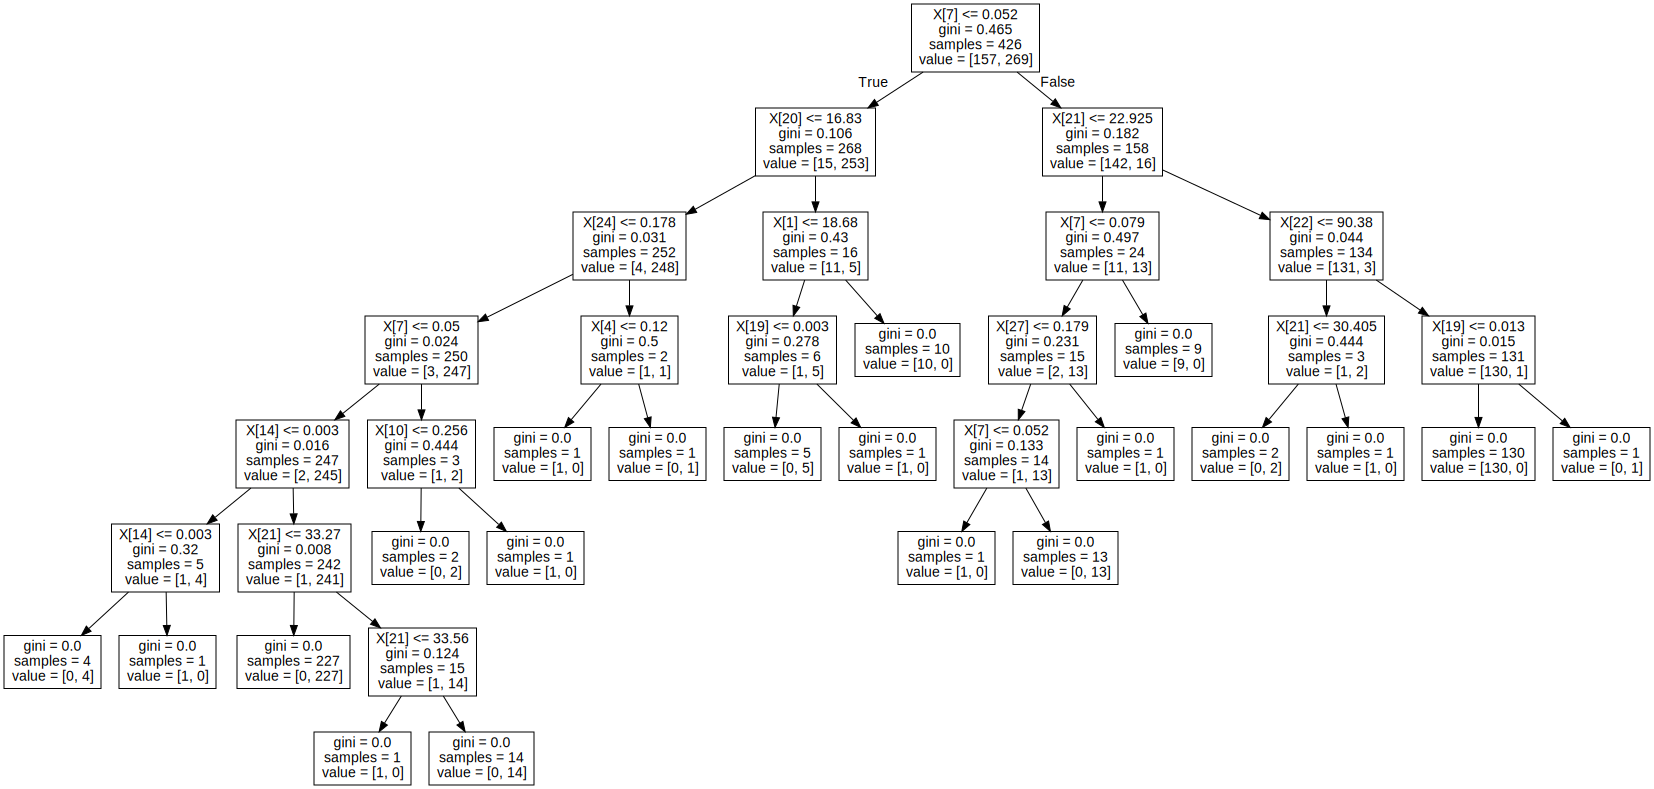

In [39]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [41]:
dt.feature_importances_

array([0.        , 0.02626797, 0.        , 0.        , 0.00504345,
       0.        , 0.        , 0.76726402, 0.        , 0.        ,
       0.0067246 , 0.        , 0.        , 0.        , 0.00996523,
       0.        , 0.        , 0.        , 0.        , 0.01841565,
       0.06845413, 0.07213254, 0.01284872, 0.        , 0.00476614,
       0.        , 0.        , 0.00811755, 0.        , 0.        ])

In [145]:
dt.feature_names_in_

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype=object)

#### Exercise

Show features in the decision tree, by order of importance.

In [42]:
feature_importances = pd.Series(data=dt.feature_importances_, index=dt.feature_names_in_)

feature_importances.sort_values(ascending=False).head()

mean concave points        0.767264
worst texture              0.072133
worst radius               0.068454
mean texture               0.026268
fractal dimension error    0.018416
dtype: float64

## The ROC curve

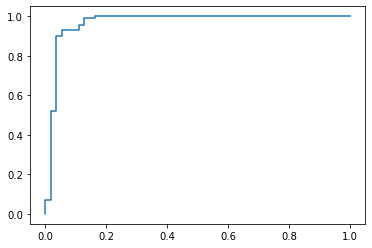

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)

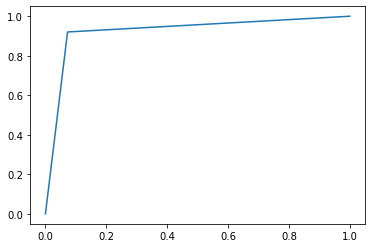

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)

In [45]:
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

0.9238636363636363

In [46]:
roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

0.9675619834710745

mmm it's something. Perhaps it has overfit? Let's check how it works on the training set to compare

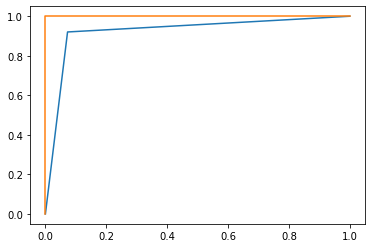

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(y_train, dt.predict_proba(X_train)[:, 1])
plt.plot(fpr, tpr)

## Bagging

Analogous in a way to K-fold cross-validation.

Based on the bootstrap technique.

We train B trees from a single training set by _bootstrapping_: constructing B subsets of the training set by sampling with replacement. The prediction for each point in the test set will be given by a vote or average of the B trees.

What effect do you think this will have in terms of bias and variance?

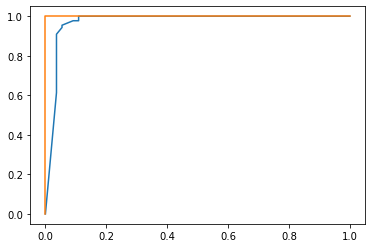

In [50]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       n_estimators=25)

bc.fit(X_train, y_train)

fpr, tpr, thresholds = roc_curve(y_test, bc.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(y_train, bc.predict_proba(X_train)[:, 1])
plt.plot(fpr, tpr)

<AxesSubplot:>

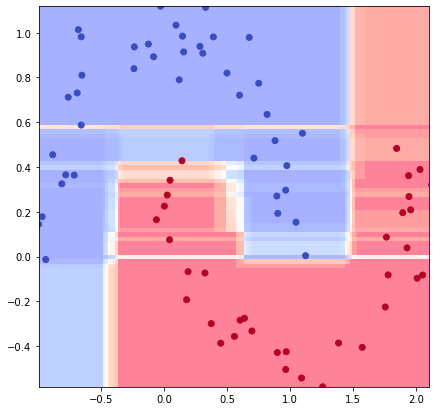

In [51]:
moons_X, moons_y = datasets.make_moons(300, noise=.1)
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       n_estimators=25)


X_train, X_test, y_train, y_test = train_test_split(moons_X, moons_y)

bc.fit(X_train, y_train)

plot_decision_boundaries(X_test[:,0], X_test[:, 1], y_test, bc)

<AxesSubplot:>

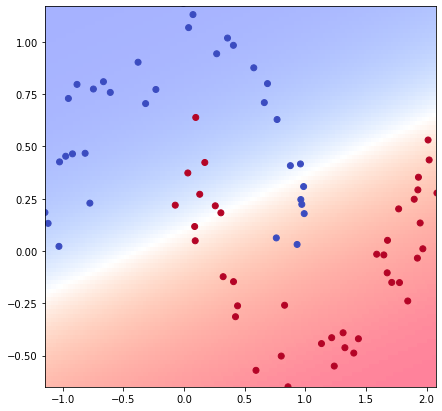

In [52]:
moons_X, moons_y = datasets.make_moons(300, noise=.1)
bc = BaggingClassifier(base_estimator=LogisticRegression(),
                       n_estimators=25)


X_train, X_test, y_train, y_test = train_test_split(moons_X, moons_y)

bc.fit(X_train, y_train)

plot_decision_boundaries(X_test[:,0], X_test[:, 1], y_test, bc)

In [53]:
bc

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=25)

### Out Of Bag (OOB) error

In order to estimate our error, we don't even need to do K-fold cross validation of to save a validation set: in effect, we have already done it.

Every observation will have been used for a given tree only with about 1/3 probability. 

Those are the OOB observations, and we can use the prediction of those $B/3$ trees that did not use observation $i$ as an error measure for those trees.

In [54]:
moons_X, moons_y = datasets.make_moons(300, noise=.1)
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       n_estimators=25,
                       oob_score=True)


X_train, X_test, y_train, y_test = train_test_split(moons_X, moons_y)

bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=25,
                  oob_score=True)

In [55]:
bc.oob_score_

0.9733333333333334

### Variable importance measures

We can use the average amount by which the Gini index decreases when introducing a split on a particular variable as a variable importance measure

## Practical: Bagging

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

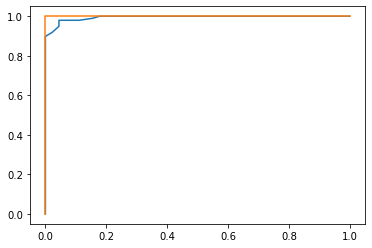

In [57]:
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       n_estimators=25,
                       oob_score=True)

X_train, X_test, y_train, y_test = train_test_split(breast_X, breast_y)

bc.fit(X_train, y_train)

fpr, tpr, thresholds = roc_curve(y_test, bc.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(y_train, bc.predict_proba(X_train)[:, 1])
plt.plot(fpr, tpr)

In [58]:
first, second = feature_importances.sort_values(ascending=False)[:2].index

x, y = X_test[first], X_test[second]
labels= y_test
model = bc
grid_step =.2


x_min = min(x)
x_max = max(x)
y_min = min(y)
y_max = max(y)

xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                     np.arange(y_min, y_max, grid_step))

Z = model.predict_proba(X_test)

Z = Z.reshape(xx.shape)

arr = plt.cm.coolwarm(np.arange(plt.cm.coolwarm.N))
arr_hsv = mpl.colors.rgb_to_hsv(arr[:,0:3])
arr_hsv[:,2] = arr_hsv[:,2] * 1.5
arr_hsv[:,1] = arr_hsv[:,1] * .5
arr_hsv = np.clip(arr_hsv, 0, 1)
arr[:,0:3] = mpl.colors.hsv_to_rgb(arr_hsv) 
my_cmap = ListedColormap(arr)

fig, ax = plt.subplots(figsize=(7,7))
plt.pcolormesh(xx, yy, Z, cmap=my_cmap)

ax.scatter(x, y, c=labels, cmap='coolwarm')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.grid(False)

ValueError: cannot reshape array of size 286 into shape (166,1)

## Boosting

Boosting is yet another tweak, and it is widely applicable. It manages to generate strong learners from weak ones.

It consists of training models _sequentially_: we train a model on the residuals of the previous model.

## Random Forests

We can further decorrelate the components of our ensemble model by decorrelating the trees more.

In Random Forests, we do this by considering only a random subset m of the predictors (usually $m \approx \sqrt{p}$ for each split that we consider.

## Practical: Random Forests

In [65]:
%config Completer.use_jedi = False

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True)

X_train, X_test, y_train, y_test = train_test_split(moons_X, moons_y)
rf.fit(X_train, y_train)

rf.oob_score_

0.9911111111111112

<AxesSubplot:>

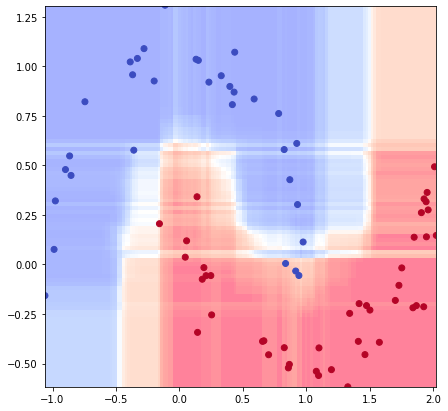

In [66]:
plot_decision_boundaries(X_test[:, 0], X_test[:, 1], y_test, rf)

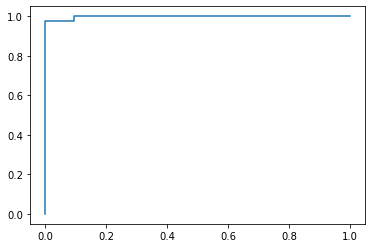

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)

#### Exercise

Predict breast cancer probability with a Random Forest. Examine the performance of your classifier and check if it overfits or not.

In [78]:
rf = RandomForestClassifier(oob_score=True)

X_train, X_test, y_train, y_test = train_test_split(breast_X, breast_y)

rf.fit(X_train, y_train)

#plot_decision_boundaries(X_test[:,0], X_test[:, 1], y_test, rf)

RandomForestClassifier(oob_score=True)

In [79]:
rf.oob_score_

0.9530516431924883

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_hat = rf.predict(X_test)
probs = rf.predict_proba(X_test)

accuracy_score(y_test, y_hat), precision_score(y_test, y_hat), recall_score(y_test, y_hat)

(0.972027972027972, 0.9666666666666667, 0.9886363636363636)

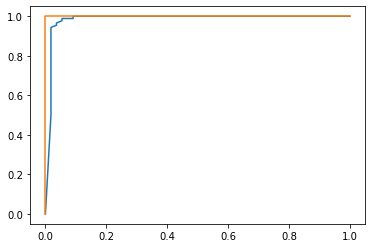

In [87]:
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(y_train, rf.predict_proba(X_train)[:, 1])
plt.plot(fpr, tpr)

# Support Vector Machines

## Hyperplanes and separating observations

A hyperplane in a p-dimensional space is a _flat affine subspace of dimension p-1_.

In 2D: a line. In 3D: a plane.

It will have an equation of the form:

$$\beta_0 + \beta_1 X_1+ \dots + \beta_p X_p = 0 $$


We can use a hyperplane to separate observations belonging to different classes

![2D hyperplanes](https://cdn-images-1.medium.com/max/1658/1*UGsHP6GeQmLBeteRz80OPw.png)

The points that, when fed into the plane equation, result in a number greater than 0 will be on one side of the hyperplane and those that have a number lower than 0 will be on the other side.

What problems do these hyperplanes (lines, in this example) have?

## The Maximal Margin Classifier

The hyperplane that has the largest minimum distance to the training observations.

<img src="https://houxianxu.github.io/images/SVM/2.png" alt="Maximal margin classifier" style="width: 600px; float: left;"/>


In this image, we can see clearly where the term _support vectors_ comes from.

Note that the maximal margin classifier depends exclusively on a small number of observations.

What does that mean in terms of bias and variance?

The non separable case

## Support Vector Classifier

It's the maximal margin classifier, adapted to have _soft_ margins.

We will allow violations to the margin, or even to the class boundary. 

We call them $\epsilon_i$ and express them in terms of margin length: if  $\epsilon_i > 0$ then an observation is on the wrong side _of the margin_. If $\epsilon_i > 1$, observation i is on the wrong side _of the hyperplane_. 

We will allow only a sum of violations 

$$C \ge \sum_{i=1}^n\epsilon_i$$

We can think of $C$ as a "budget" for margin violations 

The solution classifier is the hyperplane that maximizes the margin, provided $C$ is not overshot.


## Support Vector Classifier

#### The role of $C$

$C$ controls for us the bias-variance trade-off. Think of what happens when $C = 0$

## Practical: SVC

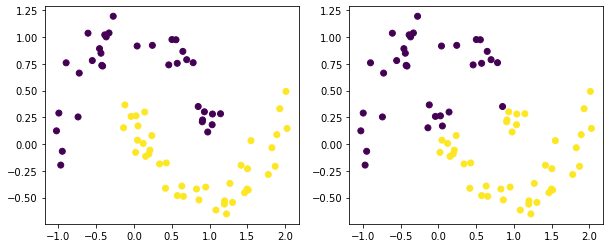

In [117]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(moons_X, moons_y)

svc = LinearSVC(C=0.1)

svc.fit(X_train, y_train)
y_hat = svc.predict(X_test)

f, ax = plt.subplots(1, 2)
f.set_size_inches(10, 4)
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test)
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_hat)

## Support Vector Machines

### Non linear decision boundaries

Sometimes the classes are not linearly separable


<img src="http://cfss.uchicago.edu/persp009_svm_files/figure-html/svm-radial-1.png" alt="Non-linearly-separable classes" style="width: 600px; float: left;"/>


Do we have to give up the support vector classifier here?

### The kernel trick

Turns out, we don't. We can transform our dataset so that we learn a separating hyperplane in a higher dimensional space. 

![Kernel trick](http://www.eric-kim.net/eric-kim-net/posts/1/imgs/data_2d_to_3d.png)

We can think of kernel as the function that transforms the left space into the right one.

We can now learn a hyperplane on the right, transformed, space and project it back on the original one.

![Hyperplane with kernel trick](http://www.eric-kim.net/eric-kim-net/posts/1/imgs/data_2d_to_3d_hyperplane.png)

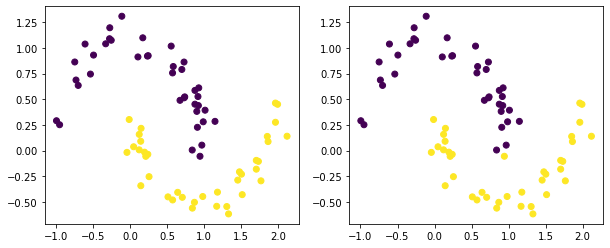

In [121]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(moons_X, moons_y)

svc = SVC(C=1, kernel='rbf')

svc.fit(X_train, y_train)
y_hat = svc.predict(X_test)

f, ax = plt.subplots(1, 2)
f.set_size_inches(10, 4)
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test)
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_hat)

In [122]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

## Classification with more than 2 classes

In [127]:
from sklearn import datasets

iris = datasets.load_iris()

X, y = iris['data'], iris['target']

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [132]:
rf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y)
rf.fit(X_train, y_train)

y_hat = rf.predict(X_test)

accuracy_score(y_test, y_hat)

0.9736842105263158

In [133]:
f1_score(y_test, y_hat)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [136]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



In [137]:
lr = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)
lr.fit(X_train, y_train)

y_hat = lr.predict(X_test)

accuracy_score(y_test, y_hat)

/Users/dani/opt/anaconda3/envs/master2022/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9210526315789473

### One versus one

`sklearn.multiclass.OneVsOneClassifier`

In [138]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [139]:
one_v_one = OneVsOneClassifier(LogisticRegression())

### One versus all

This is the most commonly used strategy for multiclass classification and is a fair default choice.

`sklearn.multiclass.OneVsRestClassifier`

In [140]:
one_v_one = OneVsRestClassifier(LogisticRegression())

# Additional References


[An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)

[scikit-learn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)


[A comparison of classifiers available in scikit-learn](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

[An amazing explanation of the kernel trick](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html)

[Ensemble methods in scikit-learn](http://scikit-learn.org/stable/modules/ensemble.html)

[Writing custom metric functions in sklearn](https://scikit-learn-laboratory.readthedocs.io/en/latest/custom_metrics.html)